# NLP Project on Spam Detection
We are going to classify messages as spam or not

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ashutosh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Fetching data

In [3]:
msgs = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
msgs[0:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

In [6]:
len(msgs)

5574

In [14]:
for idx, msg in enumerate(msgs[0:5]):
    print(idx,msg,'\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 



In [19]:
msgs = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [20]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [22]:
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
msgs['len'] = msgs['message'].apply(len)
msgs.head()

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Exploratory Data Analysis

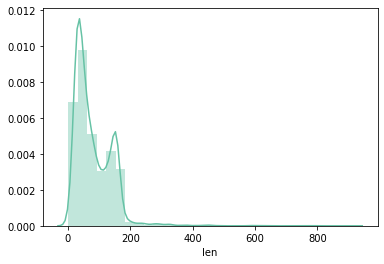

In [45]:
sns.set_palette('Set2')
sns.distplot(msgs['len'],bins=30)

In [33]:
msgs['len'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [39]:
msgs[msgs['len']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

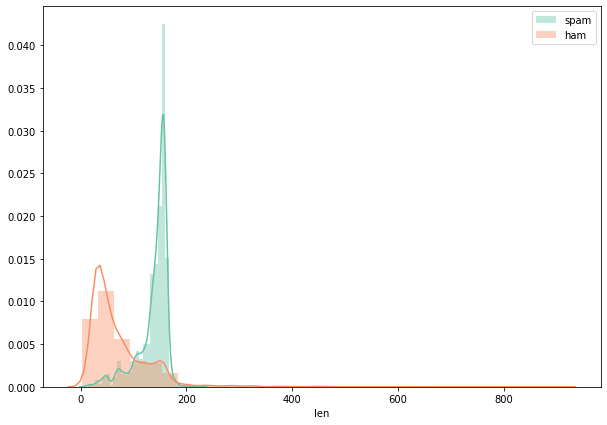

In [51]:
plt.figure(figsize=(10,7))
sns.distplot(msgs[msgs['label']=='spam']['len'],bins=30,label='spam')
sns.distplot(msgs[msgs['label']=='ham']['len'],bins=30,label='ham')
plt.legend()

We can see that most spams have greater length

## Text Preprocessing

In [55]:
import string
from nltk.corpus import stopwords

In [77]:
def process(msg):
    letters = [letter for letter in msg if letter not in string.punctuation]
    words = ''.join(letters)
    return [word for word in words.split() if word.lower() not in stopwords.words('english')]

In [78]:
msgs['message'].head(3).apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
Name: message, dtype: object

## Vectorization

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
transformer = CountVectorizer(analyzer=process).fit(msgs['message'])

In [80]:
len(transformer.vocabulary_)

11425

In [82]:
transformer.get_feature_names()[5745]


'counts'

In [83]:
messages = transformer.transform(msgs['message'])

In [84]:
print('Shape of Sparse Matrix: ', messages.shape)
print('Amount of Non-Zero occurences: ', messages.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [85]:
sparsity = (100.0 * messages.nnz / (messages.shape[0] * messages.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [86]:
from sklearn.feature_extraction.text import TfidfTransformer


In [87]:
tfidf_transformer = TfidfTransformer().fit(messages)
messages_tfidf = tfidf_transformer.transform(messages)
print(messages_tfidf.shape)

(5572, 11425)


## Training Model

In [91]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
model = MultinomialNB()

In [93]:
model.fit(messages_tfidf,msgs['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Prediction and Evaluation

In [94]:
pred = model.predict(messages_tfidf)

In [95]:
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(pred,msgs['label']))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      4940
        spam       0.85      1.00      0.92       632

    accuracy                           0.98      5572
   macro avg       0.92      0.99      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## Data Pipeline

In [98]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(msgs['message'], msgs['label'], test_size=0.25)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4179 1393 5572


In [99]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [100]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x000001B83ACE9558>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [101]:
predictions = pipeline.predict(msg_test)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1260
        spam       0.75      1.00      0.86       133

    accuracy                           0.97      1393
   macro avg       0.87      0.98      0.92      1393
weighted avg       0.98      0.97      0.97      1393

